<a href="https://colab.research.google.com/github/BelandyG/Sales-prediction/blob/main/Project_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Predictions

Belandy Gard

# Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
          
filename = ('/content/sales_predictions.csv')
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning

In [5]:
#1) How many rows and columns?
df.shape

(8523, 12)

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.")

There are 8523 rows and 12 columns in this dataset.


In [7]:
#2) What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

In [9]:
#4) I will Identify missing values.
#There are 1463 missing valuses in Item_Weight
#There are 2410 missing values in Outlet_Size
sum_missing = df.isna().sum()
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
missing_Item_Weight = sum_missing.loc['Item_Weight']
percent_missing_Item_Weight = (((missing_Item_Weight) / (df.shape[0])*100)).round(2)
print(f"There are {missing_Item_Weight} missing values in the Item_Weight column, representing {percent_missing_Item_Weight}% of values missing.")

There are 1463 missing values in the Item_Weight column, representing 17.17% of values missing.


In [11]:
# I will calculate percentage of missing values for Outlet_Size
missing_Outlet_Size = sum_missing.loc['Outlet_Size']
percent_missing_Outlet_Size = (((missing_Outlet_Size) / (df.shape[0])*100)).round(2)
print(f"There are {missing_Outlet_Size} missing values in the Item_Weight column, representing {percent_missing_Outlet_Size}% of values missing.")

There are 2410 missing values in the Item_Weight column, representing 28.28% of values missing.


In [12]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

# I will not drop the missing values. Instead I will look to impute the missing values.

# loop through all the rows in the df
for index in df.index:

  # create a filter for only items whose Item_Identifier matches that of the current row
  item_identifier_filter = df['Item_Identifier'] == df.loc[index, 'Item_Identifier']

  # calculate the mean item weight of the items in the filter
  mean_item_weight = df.loc[item_identifier_filter, 'Item_Weight'].mean()

  # assign the mean_item_weight to the Item_Weight column in this row
  df.loc[index, 'Item_Weight'] = mean_item_weight


In [13]:
# I will check if all Item_Weights have been imputed
df.isna().sum()['Item_Weight']

4

In [14]:
# I will check the 4 items left that are missing their Item_Weight
filtered_df = df[df['Item_Weight'].isna()]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [15]:
# I confirm that these Item_Identifiers each only appeared in the dataset once
for index, row in filtered_df.iterrows():
  identifier = row['Item_Identifier']
  number = df['Item_Identifier'].value_counts()[identifier]
  print(f"The Item_Idenfier {identifier} appears in the dataset {number} time(s).")

The Item_Idenfier FDN52 appears in the dataset 1 time(s).
The Item_Idenfier FDK57 appears in the dataset 1 time(s).
The Item_Idenfier FDE52 appears in the dataset 1 time(s).
The Item_Idenfier FDQ60 appears in the dataset 1 time(s).


In [16]:
# since they are all unique items, their Item_Weight is unknown
# set their Item_Weights to the average Item_Weight

for index, row in filtered_df.iterrows():
  df.loc[index, 'Item_Weight'] = df['Item_Weight'].mean()

In [17]:
# check if all Item_Weights have been imputed
df.isna().sum()['Item_Weight']

0

In [18]:
# loop through all the rows in the df
for index in df.index:

  # create a filter for only items whose Item_Identifier matches that of the current row
  outlet_identifier_filter = df['Outlet_Identifier'] == df.loc[index, 'Outlet_Identifier']

  # calculate the mean item weight of the items in the filter
  outlet_size = df.loc[outlet_identifier_filter, 'Outlet_Size'].min()

  # assign the mean_item_weight to the Item_Weight column in this row
  df.loc[index, 'Outlet_Size'] = outlet_size



In [19]:
# check if all Outlet_Sizes have been imputed
df.isna().sum()['Outlet_Size']

2410

In [20]:
# none of the Outlet_Identifiers missing their Outlet_Size had an Outlet_Size in another row
# since they are all unique outlets, their Outlet_Size is unknown
# set their Outlet_Sizes to 'Unknown'

df['Outlet_Size'].fillna('Unknown', inplace = True)

In [21]:
# I will check if all Outlet_Sizes have been imputed
df.isna().sum()['Outlet_Size']

0

In [22]:
missing = df.isna().sum().sum()
print(f"There are {missing} missing values remaining.")

There are 0 missing values remaining.


In [23]:
#6) I Confirm that there are no missing values after addressing them.
df.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).
df.describe(include = 'object').round(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [25]:
#8)For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe(include = 'number').round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.88,0.07,140.99,1997.83,2181.29
std,4.65,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.78,0.03,93.83,1987.00,834.25
50%,12.65,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# Exploratory Visual

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
num_cols = df.select_dtypes('number').columns
num_cols    

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [61]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Text(0, 0.5, 'Outlet_Location_Type')

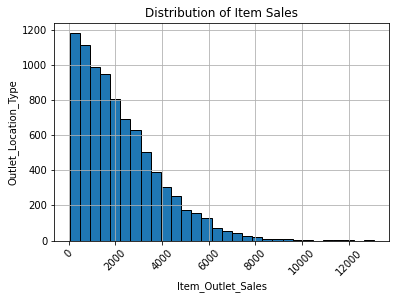

In [62]:
# This histogram shows the relationshiop of Item_Outlet_Sales and Outlet location. This can give a better understanding of which outlet produces the best sales.
ax = df['Item_Outlet_Sales'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
#ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item Sales')
ax.set_xlabel('Item_Outlet_Sales')
ax.set_ylabel('Outlet_Location_Type')

Text(0.5, 1.0, 'Distribution of Fat Content')

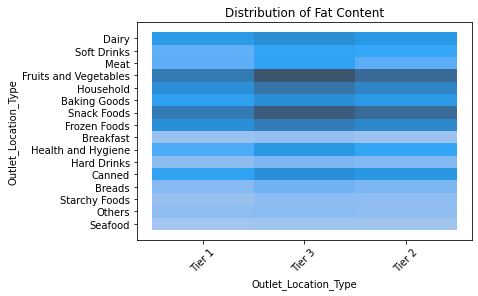

In [55]:
ax = sns.histplot(data = df, y = 'Item_Type', x='Outlet_Location_Type')
ax.tick_params(axis='x', rotation = 45)
ax.set_ylabel('Outlet_Location_Type')
ax.set_title('Distribution of Fat Content')

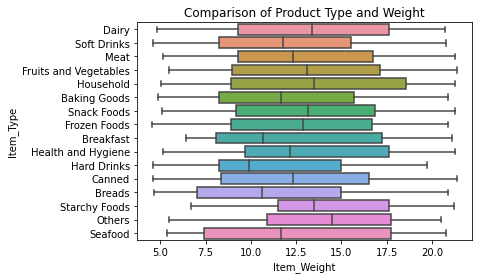

In [52]:
ax = sns.boxplot(x='Item_Weight', y='Item_Type', data=df)
ax.set_title("Comparison of Product Type and Weight");

<Axes: >

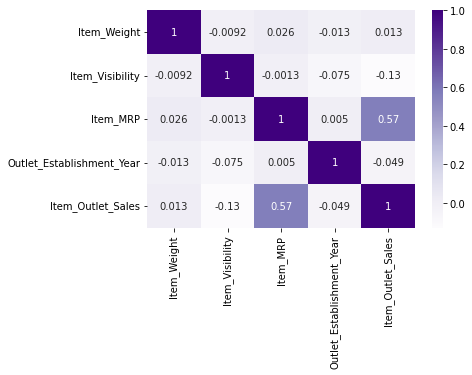

In [60]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True)

# Explanatory Visuals